In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 160x160 with 0 Axes>

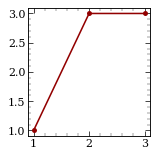

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import hist

import sys
top_path = '../'
if top_path not in sys.path:
    sys.path.append(top_path)
    
from plotters.pltStyle import pltStyle
pltStyle(style='hep')
plt.rcParams['figure.dpi'] = 150

plt.figure(num=None, figsize=(2, 2), dpi=80)
plt.plot([1,2,3],[1,3,3])
import matplotlib.pyplot as plt
pltStyle('hep')

In [21]:
nums = [-3334, -3322, -3312, -3222, -3122, -3112, -2212,
              -2112, -321, -211, -13, -11, 11, 13, 22, 130, 211,
              310, 321, 2112, 2212, 3112,
              3122, 3222, 3312, 3322, 3334]

In [22]:
### define different hadron categories
pos_mesons = [211, 321 ]
neg_mesons = [-211, -321 ]
neut_mesons = [130, 310]
leptons = [-13, -11, 11, 13]
protons = [2212]
aprotons = [-2212]
neutrons = [2112]
aneutrons = [-2112]
sPbaryons = [3222, -3112, -3312, -3334]
sNbaryons = [-3222, 3112, 3312, 3334]
sbaryons = [3122, 3322]
asbaryons = [-3122, -3322]
gamma = [22]

### define hadron categories
categories = {"pos_mesons": [211, 321 ],
                "neg_mesons": [-211, -321 ],
                "neut_mesons": [130, 310],
                "leptons": [-13, -11, 11, 13],
                "protons": [2212],
              "a-protons": [-2212],
              "neutrons": [2112],
              "a-neutrons": [-2112],
              "sPbaryons": [3222, -3112, -3312, -3334],
              "sNbaryons": [-3222, 3112, 3312, 3334],
              "sbaryons": [3122, 3322],
              "a-sbaryons": [-3122, -3322],
              "gamma": [22]}

categories = {"pos_mesons": [211, ],
              "pos_s_mesons": [321, ],
                "neg_mesons": [-211, ],
              "neg_s_mesons": [-321, ],
                "neut_mesons": [130, 310],
                "leptons": [-13, -11, 11, 13],
                "protons": [2212],
              "a-protons": [-2212],
              "neutrons": [2112],
              "a-neutrons": [-2112],
              "pos_s_baryons": [3222, -3112, -3312, -3334],
              "neg_s_baryons": [-3222, 3112, 3312, 3334],
              "neut_s_baryons": [3122, 3322],
              "neut_s_anti_baryons": [-3122, -3322],
              "gamma": [22]}

### check for consistency
set(np.concatenate([ii for ii in categories.values()])) == set(nums)

True

In [23]:
from coffea import util

In [24]:
output = util.load('HadronEfractions_QCD_Herwig.coffea')
h = output['h_bad']

In [25]:
my_stack = {}
cat_keys = categories.keys()
for key in cat_keys:
#     complex_cat = map(lambda a: complex(a)*1j, [3112, 3122])
    complex_cat = [complex(valii)*1j for valii in categories[key]]
    hist_cat = h[complex_cat,:].project('parton_flavour')
    my_stack[key] = hist_cat
    
hist_stack = hist.Stack.from_dict(my_stack)

/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


In [26]:
s = h[:,:].stack("had_type")
sumVals = h[sum,:].values()
sumVals[sumVals==0] = 1
# s*norms
for ii in range(len(s)):
#     hist_scale = s[ii].sum()
    hist_scale= 1/sumVals
    s[ii] = s[ii]*hist_scale # if hist_scale!=0 else s[ii];
#     print("scaled sum = ", s[ii].sum())

In [27]:
rc_top_old = plt.rcParams['figure.subplot.top']
plt.rcParams['figure.subplot.top'] = 0.63
plt.rcParams['figure.figsize'] = [4.2, 4.3] 

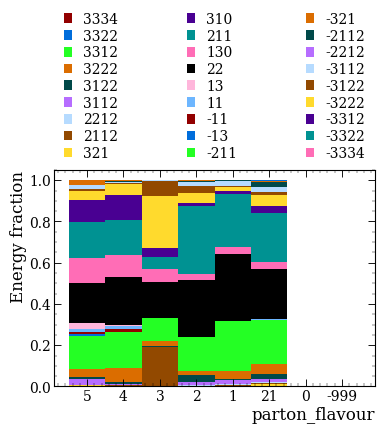

In [29]:
# h[sum,:]
# had_labels = ["$\Omega^-$"]*27
fig, ax = plt.subplots();
s.plot(stack=True, histtype="fill");
plt.ylabel("Energy fraction")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",ncol=3); #, labels = had_labels
hist_name = "tot"
# hist_name+='' if Py else '_Her'
# fig.savefig(figdir+hist_name+'.png')
# fig.savefig(figdir+hist_name+'.pdf')
# print("Figure saved = ", figdir+hist_name+'.png')
1;

In [30]:
# s = h[:,:].stack("had_type")
s = hist_stack
sumVals = h[sum,:].values()
sumVals[sumVals==0] = 1
# s*norms
for ii in range(len(s)):
#     hist_scale = s[ii].sum()
    hist_scale= 1/sumVals
    s[ii] = s[ii]*hist_scale # if hist_scale!=0 else s[ii];
#     print("scaled sum = ", s[ii].sum())

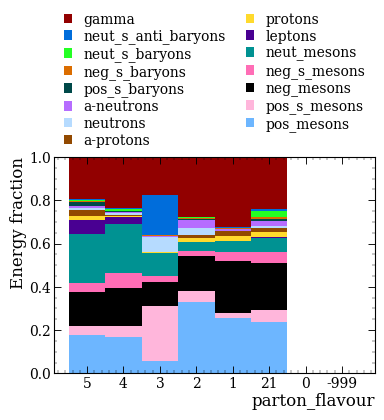

In [32]:
# h[sum,:]
# had_labels = ["$\Omega^-$"]*27
fig, ax = plt.subplots();
s.plot(stack=True, histtype="fill");
plt.ylabel("Energy fraction")
ax.set_ylim(0,1)
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",ncol=2); #, labels = had_labels
# hist_name = "tot_cat"
# hist_name+='' if Py else '_Her'
# fig.savefig(figdir+hist_name+'.png')
# fig.savefig(figdir+hist_name+'.pdf')
# print("Figure saved = ", figdir+hist_name+'.png')
1;

In [ ]:
import pickle 

# with open("hadrons/Pythia_bad_jets.pkl", "wb") as f:
#     pickle.dump(h, f)

# with open("hadrons/Pythia.pkl", "rb") as f:
#     h = pickle.load(f)
# Py = True

# with open("hadrons/Herwig.pkl", "rb") as f:
#     h = pickle.load(f)
# Py = False